In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go # 그래프 객체 생성
from plotly.subplots import make_subplots
import datetime
import seaborn as sns 
import scipy.stats
import plotly.express as px
import os 
from scipy import stats
from sklearn import metrics
import statsmodels.formula.api as smf
import scipy.stats as st
import pylab
import csv

os.getcwd()

'c:\\Users\\seong\\Desktop\\Enittproj\\Enitt'

In [2]:
## merge 1, 2 데이터
data1 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A463. 전북대 New REC 발전량.csv", encoding="ms949")
data2 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/463. 전북대NewREC 발전량.csv", encoding="ms949")
data3 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A463. 전북대 New REC 환경센서.csv", encoding="ms949")
data4 = pd.read_csv("./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/463. 전북대NewREC 환경정보.csv", encoding="ms949")



data_12 = pd.concat([data2, data1])
data_34 = pd.concat([data4, data3])
ent_data_solar = data_12.reset_index().drop('index', axis=1)
ent_data_solar

ent_data_weather = data_34.reset_index().drop('index', axis=1)
ent_data_weather

,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-11-19,15:13:12,289,443,21.2,14.6
1,2,2018-11-19,15:14:04,288,441,21.2,14.8
2,3,2018-11-19,15:14:56,284,436,21.2,14.8
3,4,2018-11-19,15:15:48,282,432,21.2,14.9
4,5,2018-11-19,15:16:40,281,431,20.8,14.9
...,...,...,...,...,...,...,...
723073,723074,2020-10-22,23:33:48,0,0,10.3,11.3
723074,723075,2020-10-22,23:34:46,0,0,10.3,11.4
723075,723076,2020-10-22,23:35:43,0,0,10.3,11.4
723076,723077,2020-10-22,23:36:41,0,0,10.4,11.4


In [3]:
## 파일불러오기 ( 추가데이터 포함되어 있는 것은 제외 )
# def ent_loadfile(solar_path, weather_path):
#     ent_data_solar = pd.read_csv(solar_path)
#     ent_data_weather = pd.read_csv(weather_path)

#     return ent_data_solar, ent_data_weather


# ent_data_solar, ent_data_weather = ent_loadfile(
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 발전량.csv", 
#     "./ENITT_SOLAR_DATA/ENITT_SOLAR_DATA/A365. 반포써밋2블럭 환경센서.csv")

# ent_data_solar["pow_date"].unique() ## 약 2018-11-26~ 2020-03-02 
# ent_data_weather["env_date"].unique() ## 약 2018-11-26 ~ 2020-03-03  

# -> low data인 환경정보로 정리 필요 // 

## 외부데이터 불러오기 
def other_loadfile(a, b, c): ## 임의로 수정 필요 
    other_data_dummy1 = pd.read_csv(a, encoding="ms949")
    other_data_dummy2 = pd.read_csv(b, encoding="ms949")
    other_data_dummy3 = pd.read_csv(c, encoding="ms949")

    return other_data_dummy1, other_data_dummy2, other_data_dummy3

other_data_dummy1, other_data_dummy2, other_data_dummy3 = other_loadfile(
    "./ENITT_SOLAR_DATA/re_allweather/allweather2018.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2019.csv",
    "./ENITT_SOLAR_DATA/re_allweather/allweather2020.csv")


other_data_dummyall = other_data_dummy1.merge(other_data_dummy2, how="outer").merge(other_data_dummy3, how="outer")
other_data_weather = other_data_dummyall[other_data_dummyall["지점명"] == "목포"]
other_data_weather["지점명"].unique()

other_data_dummy1 = pd.read_csv("./ENITT_SOLAR_DATA/otherdata/otherdata.csv", encoding="ms949")
other_data_solar = other_data_dummy1[other_data_dummy1["발전기명"] == "안산연성정수장태양광"]
other_data_solar["발전기명"].unique()
# 2019-06-16 13:00
# ent_data_weather.loc[ent_data_weather["env_date"] == "2019-06-16"]

# print()
ent_data_solar1 = ent_data_solar[ent_data_solar["pow_id"] == 2]
ent_data_weather


,env_index,env_date,env_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp
0,1,2018-11-19,15:13:12,289,443,21.2,14.6
1,2,2018-11-19,15:14:04,288,441,21.2,14.8
2,3,2018-11-19,15:14:56,284,436,21.2,14.8
3,4,2018-11-19,15:15:48,282,432,21.2,14.9
4,5,2018-11-19,15:16:40,281,431,20.8,14.9
...,...,...,...,...,...,...,...
723073,723074,2020-10-22,23:33:48,0,0,10.3,11.3
723074,723075,2020-10-22,23:34:46,0,0,10.3,11.4
723075,723076,2020-10-22,23:35:43,0,0,10.3,11.4
723076,723077,2020-10-22,23:36:41,0,0,10.4,11.4


In [4]:
## DELETE COLUMN AND EDIT COLUMN

## '지점', '지점명', '일시', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)'
#=>

## '기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '전운량', '지면온도'
reset_other_weather = other_data_weather.set_index("일시")
reset_other_weather_need = reset_other_weather[['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)','일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '10cm 지중온도(°C)']]
reset_other_weather_need.columns = ['기온', '강수량', '풍속', '풍향', '습도', '일조', '일사', '적설', '전운량', '지중온도']
reset_other_weather_need.fillna(0, inplace=True)
reset_other_weather_need



,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도
일시,,,,,,,,,,
2018-01-01 00:00,2.3,0.0,1.7,340.0,84.0,0.0,0.0,0.0,8.0,5.2
2018-01-01 01:00,2.3,0.0,2.4,20.0,89.0,0.0,0.0,0.0,0.0,5.1
2018-01-01 02:00,1.9,0.0,1.8,20.0,79.0,0.0,0.0,0.0,0.0,5.0
2018-01-01 03:00,1.6,0.0,2.1,20.0,82.0,0.0,0.0,0.0,5.0,4.9
2018-01-01 04:00,1.4,0.0,1.9,20.0,78.0,0.0,0.0,0.0,7.0,4.8
...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00,15.9,0.0,2.7,180.0,60.0,0.0,0.0,0.0,10.0,16.3
2020-10-31 20:00,14.8,0.0,2.4,160.0,64.0,0.0,0.0,0.0,4.0,16.1
2020-10-31 21:00,14.0,0.0,3.3,140.0,66.0,0.0,0.0,0.0,6.0,15.8


In [5]:
## 기업 solar weather EDA -> 필요
ent_data_weather.columns 

# ent_data_weather["env_levelsolar"].describe()
# ent_data_weather["env_slopesolar"].describe()


## 기업 날씨 데이터 1시간 별로 groupby , ( slopesolar, levelsolar => sum) , ( modtemp, airtemp => mean )
def groupby_weather():
    ## time 구분
    dummy_time_list = []
    for i in ent_data_weather["env_time"]:
        dummy_time_list.append(i[:2])

    ent_data_weather["dummy_time"] = dummy_time_list
    dummy_groupbyall = ent_data_weather.groupby(["env_date", "dummy_time"]).mean()
    ent_data_weather_groupby = dummy_groupbyall.reset_index() ## 그룹화된 인덱스 풀기 

    ### 발전량이 거의 없는 데이터 삭제 ( 9~ 19 까지만 살린다)
    drop_data = ent_data_weather_groupby.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","18", "19", "20", "21", "22", "23"]})
    ent_data_weather_sort = ent_data_weather_groupby[~drop_data].dropna()
    # print(ent_data_weather_sort)
    ent_data_weather_sort.drop("env_index", axis=1, inplace=True)

    return ent_data_weather_sort




## 기업 발전량 데이터 groupby
def groupby_solar():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_totpower"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    dummy_groupby1 = ent_data_need.groupby(["pow_date", "dummy_time"]).min()
    dummy_groupby2 = ent_data_need.groupby(["pow_date", "dummy_time"]).max()

    ## 최대값과 최솟값 차 = 1시간동안 발전한 총용량
    ## 최대값과 최솟값이 같을 경우 = 발전량 0 or 그 시간대 총발전량이 1개밖에 없어 비교 불가능한 경우
    ent_data_perhour = dummy_groupby2["pow_totpower"] - dummy_groupby1["pow_totpower"]
    ent_data_perhour = ent_data_perhour.reset_index()

    ### 발전량이 거의 없는 데이터 삭제 ( 8~ 19 까지만 살린다)
    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort
    # print(ent_data_perhour_sort["dummy_time"].unique())

def groupby_solar_reset():
    ## 필요한 컬럼만 가져오기
    ent_data_need = ent_data_solar1[["pow_date", "pow_time", "pow_dcv", "pow_dca"]]

    ## time 구분
    dummy_time_list = []
    for i in ent_data_need["pow_time"]:
        dummy_time_list.append(i[:2])
    ent_data_need["dummy_time"] = dummy_time_list

    ent_data_need["watt"] = ent_data_need["pow_dcv"] * ent_data_need["pow_dca"]

    ## RESET 발전량 :: 직류 전압 X 직류 전류 : 발전량 ,, GROUPBY해서 직류X전류 의 평균량으로 구한다
    ent_data_perhour = ent_data_need.groupby(["pow_date", "dummy_time"]).mean()
    ent_data_perhour = ent_data_perhour.reset_index()


    drop_data = ent_data_perhour.isin({"dummy_time" : ["00", "01", "02", "03", "04", "05", "06", "07","08","18", "19", "20", "21", "22", "23"]})
    ent_data_perhour_sort = ent_data_perhour[~drop_data].dropna()

    return ent_data_perhour_sort



### weather, solar join
def join_weather_solar(a, b):
    sub_index1 = a["env_date"] + " " + a["dummy_time"] + ":00"
    a.index = sub_index1

    sub_index2 = b["pow_date"] + " " + b["dummy_time"] + ":00"
    b.index = sub_index2

    joinset = a.join(b[["pow_dcv", "pow_dca", "watt" ]])
    ent_data_solar_weather = joinset.dropna()


    return ent_data_solar_weather

ent_data_weather_sort = groupby_weather()
ent_data_perhour_sort = groupby_solar_reset()
ent_data_solar_weather = join_weather_solar(ent_data_weather_sort, ent_data_perhour_sort)
ent_data_solar_weather
# pow_perhour 
# sns.boxplot(ent_data_weather_sort["env_slopesolar"])
# sns.boxplot(ent_data_weather_sort["env_levelsolar"])
# sns.boxplot(data = ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]])
# ent_data_weather_sort[["env_slopesolar", "env_levelsolar"]]

# print(len(joinset) - 2504)


,env_date,dummy_time,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt
2018-11-19 15:00,2018-11-19,15,217.800000,342.600000,18.356000,13.632000,159.400000,6.220000,991.140000
2018-11-19 16:00,2018-11-19,16,72.434783,114.275362,11.605797,10.982609,150.292308,1.793846,281.600000
2018-11-19 17:00,2018-11-19,17,2.000000,2.560606,6.257576,7.593939,117.342857,0.125714,15.017143
2018-11-20 09:00,2018-11-20,09,343.594203,521.086957,14.363768,8.773913,163.304348,8.839130,1442.645652
2018-11-20 10:00,2018-11-20,10,482.628571,700.400000,19.031429,10.270000,166.391304,9.286957,1486.908696
...,...,...,...,...,...,...,...,...,...
2019-07-09 15:00,2019-07-09,15,228.029412,249.426471,29.663235,25.710294,150.117647,3.945588,582.639706
2019-07-09 16:00,2019-07-09,16,328.477612,351.940299,32.782090,26.310448,157.348485,2.913636,431.663636
2019-07-09 17:00,2019-07-09,17,287.544118,334.558824,31.414706,25.722059,159.287879,2.516667,369.843939
2019-07-10 09:00,2019-07-10,09,117.088235,126.044118,20.438235,18.377941,148.705882,2.348529,350.195588


In [6]:
## 기업, 공공 join

join_ent_other = ent_data_solar_weather.join(reset_other_weather_need)
join_ent_other["일사"].fillna(0, inplace=True)
# join_ent_other
join_ent_other["match_solar"] = join_ent_other["일사"] * 1000000 / 3600
join_ent_other_set = join_ent_other.drop(["env_date", "dummy_time"], axis=1)

## csv로 저장
join_ent_other_set.to_csv('NewREC2_join.csv', encoding='utf-8')


2.4867152443253024
-1.2363624507431186


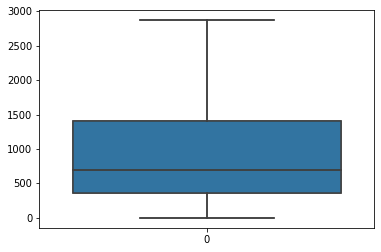

In [7]:
## 이상치 제거

sns.boxplot(data = join_ent_other_set["watt"])


import pandas as pd
from scipy import stats

# deleteoutlier = stats.zscore(join_ent_other_set["watt"])
# deleteoutlier
deleteoutlier = stats.zscore(join_ent_other_set["watt"])
join_ent_other_set["z_score"] = deleteoutlier

join_ent_other_del = join_ent_other_set.loc[join_ent_other_set['z_score'].abs()<=3]
sns.boxplot(data = join_ent_other_del["watt"])
print(join_ent_other_del['z_score'].max())
print(join_ent_other_del['z_score'].min())

## 다시저장
join_ent_other_del.to_csv('NewREC2_join.csv', encoding='utf-8')


In [8]:
join_ent_other_del.describe()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1.952000e+03
mean,427.202267,406.168222,20.922530,13.927629,155.918999,5.872495,890.045567,12.854559,0.082018,4.226281,209.948770,59.160348,0.655789,1.529401,0.052203,5.010246,12.733555,424.833504,-1.148330e-16
std,301.974264,289.459601,13.978955,9.725810,14.229137,5.252231,774.191569,8.498158,0.938673,2.315396,139.365544,16.240548,0.420791,0.959810,0.419679,3.709864,7.607307,266.613833,1.000256e+00
min,0.000000,0.000000,-7.466667,-6.160294,103.000000,0.000000,0.000000,-5.300000,0.000000,0.000000,0.000000,17.000000,0.000000,0.010000,0.000000,0.000000,2.100000,2.777778,-1.149940e+00
25%,151.552952,147.414179,9.516204,5.789338,147.363971,1.764447,271.134979,5.600000,0.000000,2.600000,20.000000,47.000000,0.200000,0.690000,0.000000,1.000000,5.800000,191.666667,-7.996331e-01
50%,405.976343,375.714514,19.835028,12.981581,157.911106,4.032722,629.101624,11.650000,0.000000,3.800000,270.000000,59.000000,1.000000,1.440000,0.000000,6.000000,10.650000,400.000000,-3.371398e-01
75%,676.536765,638.314496,31.823162,22.378309,164.326462,8.463495,1325.916220,20.900000,0.000000,5.500000,340.000000,69.000000,1.000000,2.250000,0.000000,8.000000,19.900000,625.000000,5.631453e-01
max,1051.529412,1027.088235,53.908824,35.026471,192.170213,17.882353,2868.673134,31.100000,33.200000,14.000000,360.000000,100.000000,1.000000,3.670000,5.200000,10.000000,29.200000,1019.444444,2.556389e+00


In [9]:
join_ent_other_del.corr()

,env_slopesolar,env_levelsolar,env_modtemp,env_airtemp,pow_dcv,pow_dca,watt,기온,강수량,풍속,풍향,습도,일조,일사,적설,전운량,지중온도,match_solar,z_score
env_slopesolar,1.000000,0.968970,0.772937,0.524659,0.294058,0.790685,0.783853,0.255199,-0.096378,-0.056202,0.055157,-0.355360,0.493842,0.803664,-0.074931,-0.388072,0.165858,0.803664,0.783853
env_levelsolar,0.968970,1.000000,0.842542,0.632830,0.240392,0.784365,0.768177,0.387439,-0.092329,-0.117137,0.081563,-0.356208,0.481861,0.827458,-0.086934,-0.361971,0.303124,0.827458,0.768177
env_modtemp,0.772937,0.842542,1.000000,0.936343,0.024819,0.663986,0.627295,0.779082,-0.029082,-0.279754,0.195006,-0.234923,0.352569,0.762943,-0.190998,-0.211199,0.697967,0.762943,0.627295
env_airtemp,0.524659,0.632830,0.936343,1.000000,-0.112359,0.470527,0.424218,0.934734,0.008264,-0.331027,0.234664,-0.135246,0.229798,0.609500,-0.208793,-0.091489,0.874087,0.609500,0.424218
pow_dcv,0.294058,0.240392,0.024819,-0.112359,1.000000,-0.107509,-0.073429,-0.237306,-0.070726,0.074400,-0.084241,-0.101577,0.201961,0.193148,-0.093571,-0.141215,-0.271731,0.193148,-0.073429
pow_dca,0.790685,0.784365,0.663986,0.470527,-0.107509,1.000000,0.996969,0.267682,-0.068629,-0.059473,0.068030,-0.304936,0.364857,0.641953,-0.110436,-0.294417,0.195376,0.641953,0.996969
watt,0.783853,0.768177,0.627295,0.424218,-0.073429,0.996969,1.000000,0.218764,-0.070573,-0.037682,0.055810,-0.306173,0.365138,0.624788,-0.111817,-0.300156,0.147840,0.624788,1.000000
기온,0.255199,0.387439,0.779082,0.934734,-0.237306,0.267682,0.218764,1.000000,0.038353,-0.301496,0.259795,-0.102466,0.148079,0.469887,-0.212616,-0.011824,0.957245,0.469887,0.218764
강수량,-0.096378,-0.092329,-0.029082,0.008264,-0.070726,-0.068629,-0.070573,0.038353,1.000000,-0.033620,-0.033264,0.181975,-0.128250,-0.116161,0.022525,0.115374,0.058358,-0.116161,-0.070573
풍속,-0.056202,-0.117137,-0.279754,-0.331027,0.074400,-0.059473,-0.037682,-0.301496,-0.033620,1.000000,0.022965,-0.103790,0.111002,0.041863,0.073636,-0.076750,-0.218296,0.041863,-0.037682


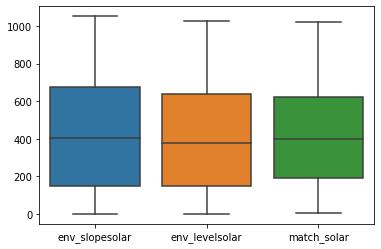

In [10]:
sns.boxplot(data = join_ent_other_del[["env_slopesolar", "env_levelsolar", "match_solar"]])

In [11]:
import scipy.stats

print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["match_solar"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["match_solar"]))
print("------------------")
print(
    scipy.stats.pearsonr(join_ent_other_del["env_levelsolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["env_slopesolar"], join_ent_other_del["watt"]), 
    scipy.stats.pearsonr(join_ent_other_del["match_solar"], join_ent_other_del["watt"]))

(0.8274579795299426, 0.0) (0.803663806939773, 0.0)
------------------
(0.7681767724133067, 0.0) (0.7838534389325632, 0.0) (0.6247881309706232, 8.077197330280797e-212)


In [12]:
import statsmodels.api as sm

Y = join_ent_other_del["watt"]
X = join_ent_other_del["env_slopesolar"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
# results.summary()

X2 = join_ent_other_del["match_solar"]
model2 = sm.OLS(Y,X2)
results1 = model2.fit()


print(results.summary())
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                   watt   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     3107.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:06:47   Log-Likelihood:                -14823.
No. Observations:                1952   AIC:                         2.965e+04
Df Residuals:                    1950   BIC:                         2.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             31.5325     18.859      1.